In [1]:
import numpy as np
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt
%matplotlib notebook

In [15]:
rms_dat = pd.read_csv("forcepsffitdiff_d4588_f2_c0.out_collap.txt")

<IPython.core.display.Javascript object>


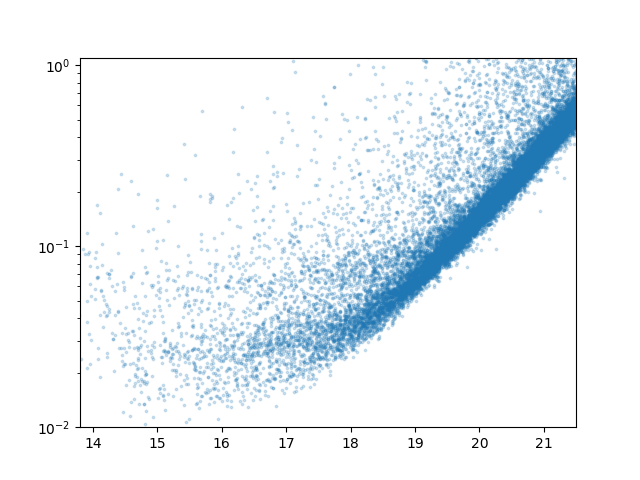

(13.8, 21.5)

In [17]:
psf_det = np.where(rms_dat["rmsPSF"] > 0)
plt.scatter(rms_dat["mag"].ix[psf_det], rms_dat["rmsPSF"].ix[psf_det], s=3, alpha=0.2)
plt.yscale("log")
plt.ylim(1e-2,1.1)
plt.xlim(13.8,21.5)

<IPython.core.display.Javascript object>


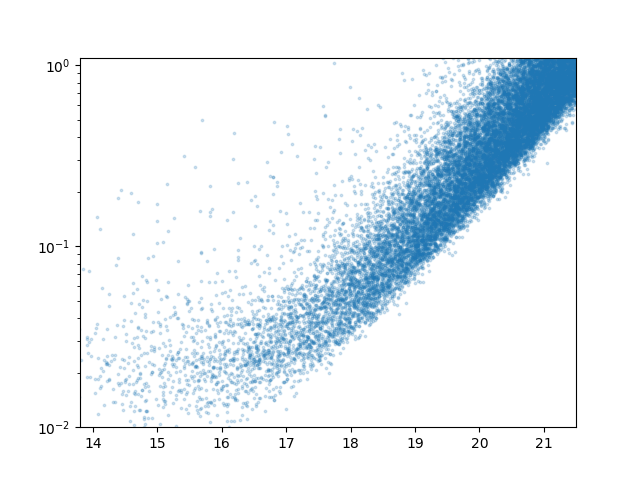

(13.8, 21.5)

In [18]:
ap_det = np.where(rms_dat["rmsAp"] > 0)
plt.scatter(rms_dat["mag"].ix[ap_det], rms_dat["rmsAp"].ix[ap_det], s=3, alpha=0.2)
plt.yscale("log")
plt.ylim(1e-2,1.1)
plt.xlim(13.8,21.5)

Now need to fit the function

$$\sigma(m) = a + b 10^{0.4m} + c 10^{0.8m}$$

to these data in order to determine a functional form for the uncertainties as a function of magnitude.

In [19]:
def strateva(m, a, b, c):
    return a + b*10**(0.4*m) + c*10**(0.8*m)

In [22]:
from scipy.optimize import curve_fit

In [26]:
p0_strateva = [0.02, 1, 1]
popt, pcov = curve_fit(strateva, rms_dat["mag"].ix[psf_det], rms_dat["rmsPSF"].ix[psf_det], p0_strateva )

<IPython.core.display.Javascript object>


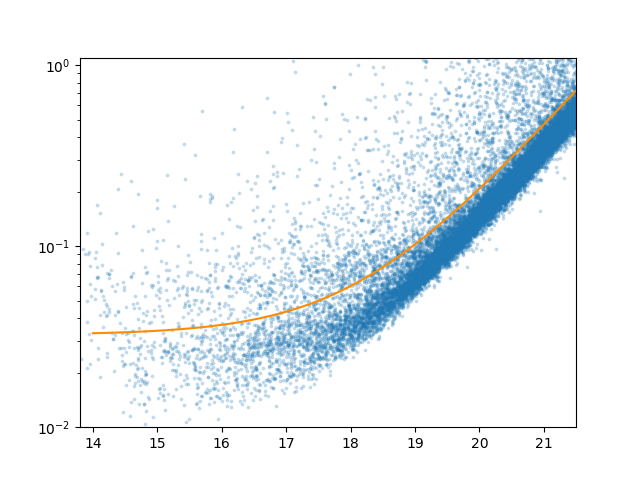

(13.8, 21.5)

In [31]:
mag_grid = np.linspace(14, 22)
plt.scatter(rms_dat["mag"].ix[psf_det], rms_dat["rmsPSF"].ix[psf_det], s=3, alpha=0.2)
plt.plot(mag_grid, strateva(mag_grid, popt[0], popt[1], popt[2]), color="DarkOrange")
plt.yscale("log")
plt.ylim(1e-2,1.1)
plt.xlim(13.8,21.5)

It is clear that highly variable sources are dramatically influencing the fit. We attempt a $k\sigma$ procedure to get better convergence on the fit. 

In [63]:
def sigma_mad(data):
    return 1.48*np.median(np.abs(data - np.median(data)))

In [54]:
mag_grid = np.linspace(14, 23)
psf_mag = np.array(rms_dat["mag"].ix[psf_det])
psf_rms = np.array(rms_dat["rmsPSF"].ix[psf_det])

<IPython.core.display.Javascript object>


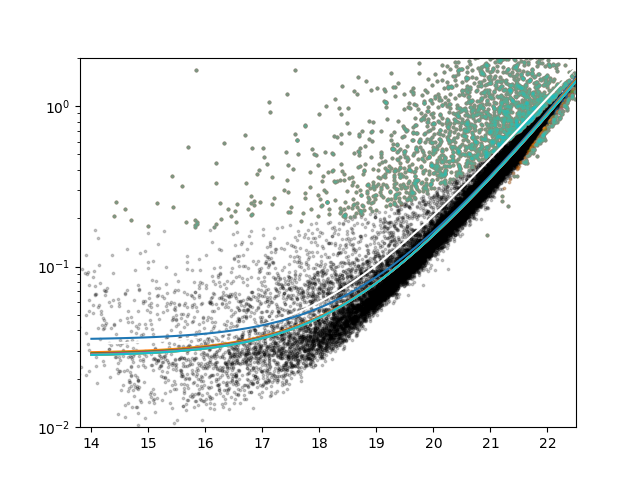

0.648335247754
0.0280448162676
0.648743021614
0.0282196568638
0.648949002101
0.0282970402127
0.649027379724
0.028299896382
0.649056438477
0.0283337525761
0.649073018784
0.0283628000428
0.649081915018
0.0283739990444
0.649091672995
0.0283756228166
0.649095553155
0.0283502787424
0.649096612381
0.0283393568753


(13.8, 22.5)

In [71]:
p0_strateva = [0.02, 1, 1]
popt, pcov = curve_fit(strateva, psf_mag, psf_rms, p0_strateva )
residuals = psf_rms - strateva(psf_mag, popt[0], popt[1], popt[2])


plt.scatter(psf_mag, psf_rms, s=3, alpha=0.2, c="k")
plt.plot(mag_grid, strateva(mag_grid, popt[0], popt[1], popt[2]), color="white")

for i in range(10):
    clipped = np.logical_not(np.abs(residuals/sigma_mad(residuals)) <= 5)
    plt.scatter(psf_mag[clipped], psf_rms[clipped], s=3, alpha=0.2)
    popt, pcov = curve_fit(strateva, psf_mag[~clipped], psf_rms[~clipped], p0_strateva )
    residuals = psf_rms - strateva(psf_mag, popt[0], popt[1], popt[2])
    print(np.std(residuals, ddof=1))
    print(sigma_mad(residuals))
    plt.plot(mag_grid, strateva(mag_grid, popt[0], popt[1], popt[2]))

plt.yscale("log")
plt.ylim(1e-2,2)
plt.xlim(13.8,22.5)

In [42]:
clipped = np.logical_not(np.abs(residuals/np.std(residuals, ddof=1)) <= 3)

<IPython.core.display.Javascript object>


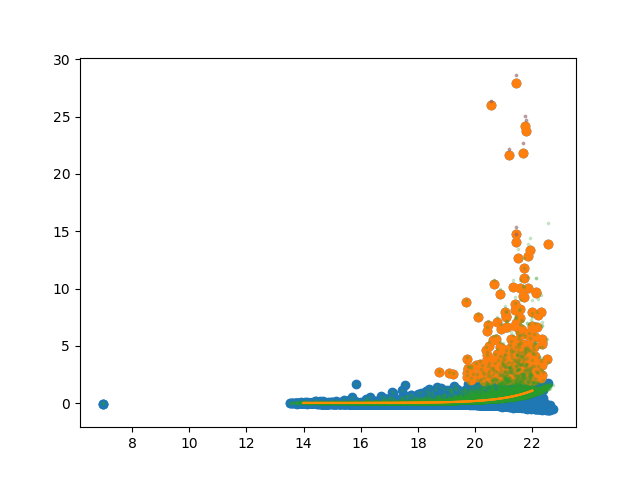

In [43]:
plt.figure()
plt.scatter(psf_mag, residuals)
plt.scatter(psf_mag[clipped], residuals[clipped])

In [37]:
np.std(residuals)

0.64549544112800494